In [2]:
import torch
torch.cuda.is_available()

True

In [3]:
import matplotlib.pyplot as plt
import glob
import tensorflow as tf
import numpy as np

In [4]:
def get_section_results(file, X_label='Train_EnvstepsSoFar', Y_label='Train_AverageReturn'):
    """
        requires tensorflow==1.12.0
    """
    X = []
    Y = []
    for e in tf.compat.v1.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag == X_label:
                X.append(v.simple_value)
            elif v.tag == Y_label:
                Y.append(v.simple_value)
    return X, Y

def getXY(exp_name, X_label='Train_EnvstepsSoFar', Y_label='Train_AverageReturn'):
    logdir = '/home/harvey/Documents/cs285/CS285-Project/data/%s/events*'%exp_name
    eventfile = glob.glob(logdir)[0]
    X, Y = get_section_results(eventfile, X_label=X_label, Y_label=Y_label)
    return X, Y

def getXYpeer(exp_name, X_label='Train_EnvstepsSoFar', Y_label='Train_AverageReturn', peer_num=2):
    result = []
    for i in range(peer_num):
        Xi, Yi = getXY(exp_name, "Agent%d_"%i+X_label, "Agent%d_"%i+Y_label)
        result.append((Xi, Yi))
    return result

def check(exp_name):
    X, Y = getXY(exp_name)
    for i, (x, y) in enumerate(zip(X, Y)):
        print('Iteration {:d} | Train steps: {:d} | Return: {}'.format(i, int(x), y))

In [5]:
exp1 = "todo_CartPole-v0_24-10-2022_19-17-05"
exp2 = "todo_CartPole-v0_25-10-2022_12-53-39"
exp3 = "todo_CartPole-v0_25-10-2022_12-57-28"
exp4 = "todo_CartPole-v0_25-10-2022_13-03-10"
exp5 = "todo_CartPole-v0_25-10-2022_13-05-46"

exp6 = "todo_CartPole-v0_27-11-2022_18-57-45"
exp7 = "CartPole_eps0_CartPole-v0_27-11-2022_19-15-02"
exp8 = "CartPole_eps0_discount0.9_CartPole-v0_27-11-2022_19-25-54"
exp9 = "CartPole_eps0_discount0.99_CartPole-v0_27-11-2022_19-40-44"

sac1 = "sac_peer_test_HalfCheetah-v4_28-11-2022_00-03-31"
sac_hw3q6 = "sac_hw3q6_hprm_HalfCheetah-v4_28-11-2022_00-11-32"
sac_hw3q6a3_alt = "sac_hw3q6_hprm_3agents_HalfCheetah-v4_28-11-2022_00-26-21"
sac_hw3q6a3 = "sac_hw3q6_hprm_3agents_HalfCheetah-v4_28-11-2022_11-51-29"

sac_temp0p1 = "sac_peer2_agents_rpb20000_temp0.1_HalfCheetah-v4_09-12-2022_02-17-56"
sac_temp0p5 = "sac_peer2_agents_rpb20000_temp0.5_HalfCheetah-v4_09-12-2022_02-17-38"
# check(exp6)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


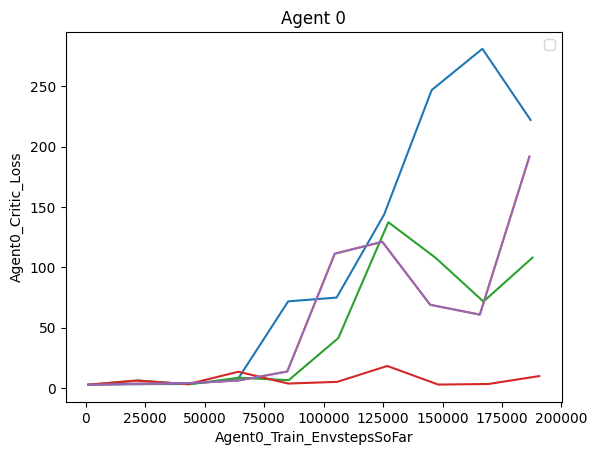

In [5]:
X_label='Agent0_Train_EnvstepsSoFar'
Y_label='Agent0_Critic_Loss'
exp_names = [exp1, exp2, exp3, exp4, exp5]

for exp_name in exp_names:
    X1, Y1 = getXY(exp_name, X_label=X_label, Y_label=Y_label)
    plt.plot(X1, Y1) # , label=exp_name
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend()

plt.title("Agent 0")
plt.savefig("agent0.png")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


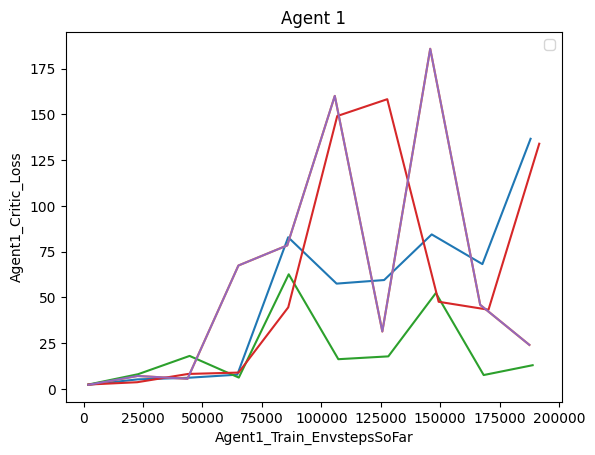

In [6]:
X_label='Agent1_Train_EnvstepsSoFar'
Y_label='Agent1_Critic_Loss'
exp_names = [exp1, exp2, exp3, exp4, exp5]

for exp_name in exp_names:
    X1, Y1 = getXY(exp_name, X_label=X_label, Y_label=Y_label)
    plt.plot(X1, Y1) # , label=exp_name
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend()

plt.title("Agent 1")
plt.savefig("agent1.png")
plt.show()

### SAC Peer Learning Sanity Check

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


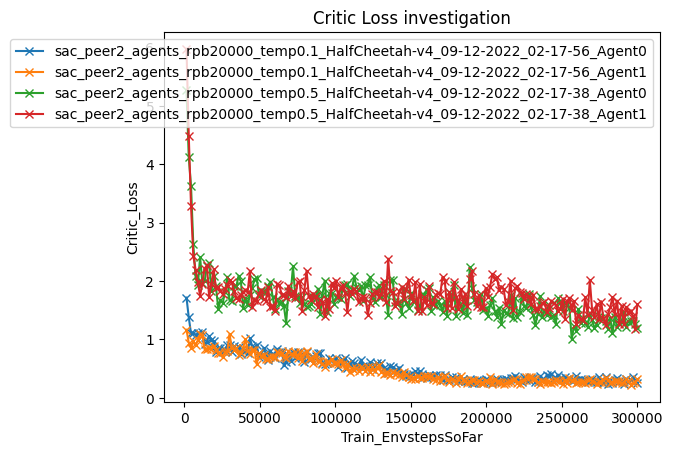

In [6]:
X_label='Train_EnvstepsSoFar'
Y_label='Critic_Loss'

exp_names = [sac_temp0p1, sac_temp0p5]
peer_num = 2

for exp_name in exp_names:
    series = getXYpeer(exp_name, X_label, Y_label, peer_num)
    for i in range(peer_num):
        X, Y = series[i]
        plt.plot(X, Y, marker='x', label=exp_name+"_Agent%d"%i) 
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend()

plt.title("Critic Loss investigation")
plt.show()

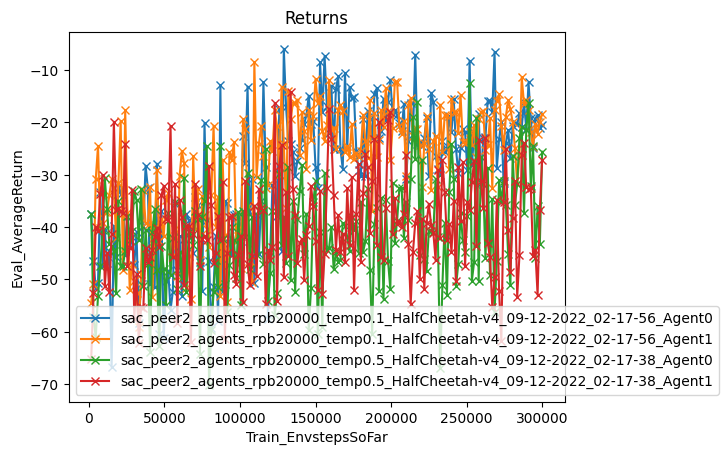

In [7]:
X_label='Train_EnvstepsSoFar'
Y_label='Eval_AverageReturn'

exp_names = [sac_temp0p1, sac_temp0p5]
peer_num = 2

for exp_name in exp_names:
    series = getXYpeer(exp_name, X_label, Y_label, peer_num)
    for i in range(peer_num):
        X, Y = series[i]
        plt.plot(X, Y, marker='x', label=exp_name+"_Agent%d"%i) 
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend()

plt.title("Returns")
plt.show()

### SAC Peer Learning HW3 comparison experiment

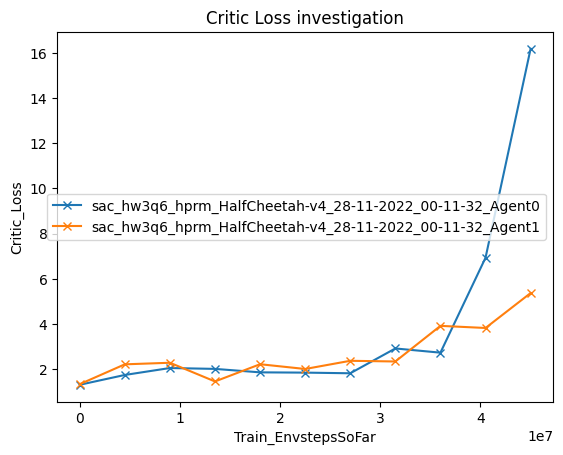

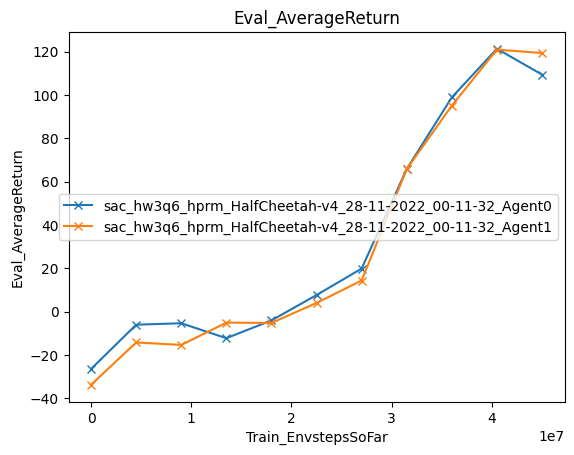

In [9]:
exp_names = [sac_hw3q6]
peer_num = 2

X_label='Train_EnvstepsSoFar'
Y_label='Critic_Loss'
for exp_name in exp_names:
    series = getXYpeer(exp_name, X_label, Y_label, peer_num)
    for i in range(peer_num):
        X, Y = series[i]
        plt.plot(X, Y, marker='x', label=exp_name+"_Agent%d"%i) 
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend()
plt.title("Critic Loss investigation")
plt.show()

X_label='Train_EnvstepsSoFar'
Y_label='Eval_AverageReturn'
for exp_name in exp_names:
    series = getXYpeer(exp_name, X_label, Y_label, peer_num)
    for i in range(peer_num):
        X, Y = series[i]
        plt.plot(X, Y, marker='x', label=exp_name+"_Agent%d"%i) 
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend()
plt.title("Eval_AverageReturn")
plt.show()

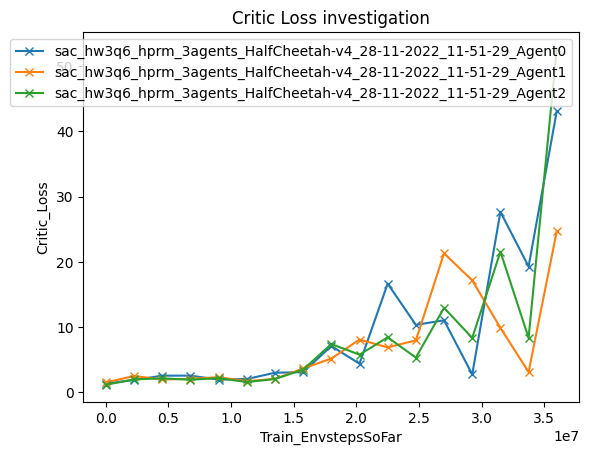

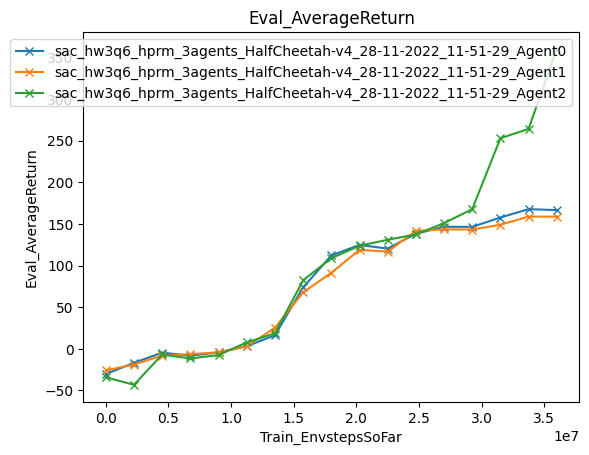

In [12]:
exp_names = [sac_hw3q6a3] # sac_hw3q6a3_alt
peer_num = 3

X_label='Train_EnvstepsSoFar'
Y_label='Critic_Loss'
for exp_name in exp_names:
    series = getXYpeer(exp_name, X_label, Y_label, peer_num)
    for i in range(peer_num):
        X, Y = series[i]
        plt.plot(X, Y, marker='x', label=exp_name+"_Agent%d"%i) 
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend()
plt.title("Critic Loss investigation")
plt.show()

X_label='Train_EnvstepsSoFar'
Y_label='Eval_AverageReturn'
for exp_name in exp_names:
    series = getXYpeer(exp_name, X_label, Y_label, peer_num)
    for i in range(peer_num):
        X, Y = series[i]
        plt.plot(X, Y, marker='x', label=exp_name+"_Agent%d"%i) 
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend()
plt.title("Eval_AverageReturn")
plt.show()

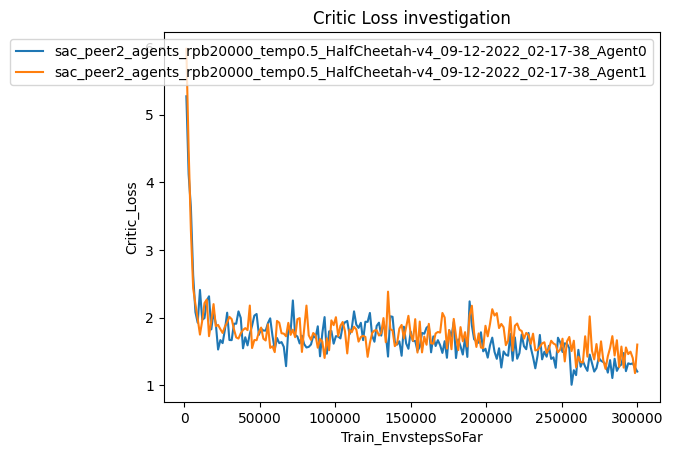

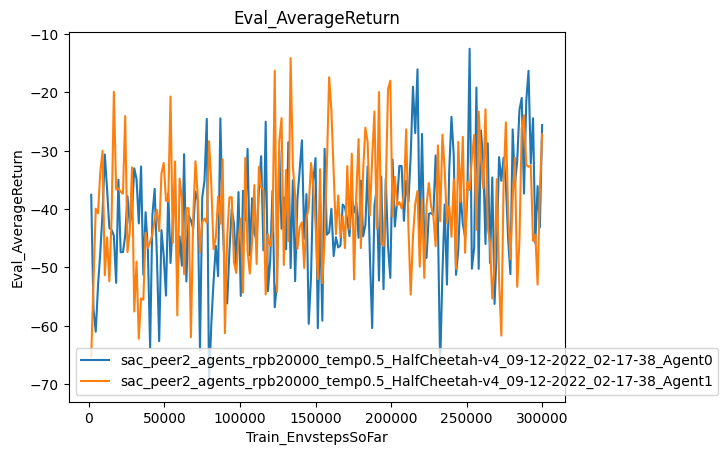

In [14]:
exp_names = [sac_temp0p5] # sac_hw3q6a3_alt
peer_num = 2

X_label='Train_EnvstepsSoFar'
Y_label='Critic_Loss'
for exp_name in exp_names:
    series = getXYpeer(exp_name, X_label, Y_label, peer_num)
    for i in range(peer_num):
        X, Y = series[i]
        plt.plot(X, Y, label=exp_name+"_Agent%d"%i) 
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend()
plt.title("Critic Loss investigation")
plt.show()

X_label='Train_EnvstepsSoFar'
Y_label='Eval_AverageReturn'
for exp_name in exp_names:
    series = getXYpeer(exp_name, X_label, Y_label, peer_num)
    for i in range(peer_num):
        X, Y = series[i]
        plt.plot(X, Y, label=exp_name+"_Agent%d"%i) 
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend()
plt.title("Eval_AverageReturn")
plt.show()